# Altair with simple, sample data

- **[Altair documentation](https://altair-viz.github.io/index.html)**


- [Vega-Lite site](https://vega.github.io/vega-lite/)
- [Vega-Lite documentation](https://vega.github.io/vega-lite/docs/)
- [Vega-Lite 2.0 Medium article](https://medium.com/@uwdata/introducing-vega-lite-2-0-de6661c12d58)
- [Vega-Lite 2.0 OpenVisConf 2017 talk](https://www.youtube.com/watch?v=9uaHRWj04D4)
- [About the Vega project](https://vega.github.io/vega/about/)

#### This is just a made-up data set inspired by a [Nature Methods article](https://www.nature.com/articles/nmeth.2807)

In [1]:
import pandas as pd
import altair as alt

## Load in sample data

We'll load all data into a Panda DataFrame. A DataFrame is just a special data structure that is meant for "tablular data", which is like a spreadsheet. DataFrames also have build-in functions that can modify and display the data.

This pretend data set has values for five items in five categories. It gives us a chance to play around with various visual representations. **The best choice depends on which comparisons are most important to the story you're trying to tell!**

In [2]:
df_orig = pd.read_csv('data/NatureBarValues.csv')

### Preview the data

You can just type the name of the dataframe to get a printout of the contents

In [3]:
df_orig

,Item,Category 1,Category 2,Category 3,Category 4,Category 5
0,Item 1,6,29,18,30,7
1,Item 2,8,27,17,13,11
2,Item 3,10,21,16,4,19
3,Item 4,20,17,16,9,7
4,Item 5,23,5,15,19,2


## Make data "tidy"

The data isn't in the right form for visualization in Altair (or Tableau or ggplot2). Right now it's "wide" and it needs to be "tall". Once we "tidy" the data, each column will have only one type of information, and the same types of data won't be spread across multiple columns.

See my previous *Tidy Data in Python with JupyterLab*
[repository](https://github.com/emonson/tidy-data-python) and [video](https://library.capture.duke.edu/Panopto/Pages/Viewer.aspx?id=d8a3efe2-48d7-4505-acd3-a943013c2442)

In Pandas we do this by using the `melt()` function. We specify a list of columns that won't be pivoted using the `id_vars=` argument (here the list only has one item in it), and all other columns will be pivoted. We also here specify a name for the column that used to be the column headers. The `head()` method lets you view the first set of rows.

In [4]:
df = df_orig.melt(id_vars=["Item"], var_name="Category")
df.head(10)

,Item,Category,value
0,Item 1,Category 1,6
1,Item 2,Category 1,8
2,Item 3,Category 1,10
3,Item 4,Category 1,20
4,Item 5,Category 1,23
5,Item 1,Category 2,29
6,Item 2,Category 2,27
7,Item 3,Category 2,21
8,Item 4,Category 2,17
9,Item 5,Category 2,5


## Heatmap

A heatmap is a very compact visual representation of the data, very similar to the original table, where rectangles are colored by the values in each cell. 

*We're not really good at quantitatively comparing color values, though, so this isn't a great representation if you want people to accurately detect the numerical patterns. Also, note that Category 3 values aren't distinguishable.*

### Method chaining

In Altair it's easy to construct our visualization by **chaining together, with a dot between** a "declaration" of our visualization following the pattern:

- `alt` – calls the Altair module through it's abbreviated name stated above
- `Chart()` – feed in the Pandas DataFrame our data values come from
- `mark_xxxx()` – sets the [mark type](https://altair-viz.github.io/user_guide/marks.html) to use – here a rectangle
- `encode()` – specified the "[encoding channels](https://altair-viz.github.io/user_guide/encoding.html#encoding-channels)" for this visualization, things like x (horizontal axis), y (vertical axis), color, tooltip, shape, size, etc.
- `transform_xxxx()` – [data transformations](https://altair-viz.github.io/user_guide/transform.html) like filter, calculate, aggregate, lookup, etc. 

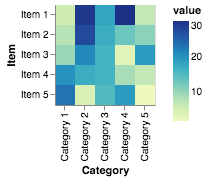

In [5]:
alt.Chart(df).mark_rect().encode(
    x = 'Category',
    y = 'Item',
    color = 'value'
)

## Vega-Lite specification

What Altair really produces is a Vega-Lite JSON declarative specification for building the visualization, and JupyterLab has Vega and Vega-Lite built in for rendering. This is a nice separation of concerns, where Altair just needs to know how to make JSON, and the renderer knows how to actually create the visuals!

We can see the specification behind each visualization by using `.to_json()` or `.to_dict()`. Here we'll use the latter, because the printout is more compact, but feel free to try the former.

**Note that all of the data is included in the JSON!!**

- [Medium article on Vega-Lite adoption](https://medium.com/@robin.linacre/why-im-backing-vega-lite-as-our-default-tool-for-data-visualisation-51c20970df39)

In [6]:
heatmap = alt.Chart(df).mark_rect().encode(
    x = 'Category',
    y = 'Item',
    color = 'value'
)
heatmap.to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'data': {'name': 'data-dcc63c1bd6179d79fcae39778c52b169'},
 'mark': 'rect',
 'encoding': {'color': {'type': 'quantitative', 'field': 'value'},
  'x': {'type': 'nominal', 'field': 'Category'},
  'y': {'type': 'nominal', 'field': 'Item'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json',
 'datasets': {'data-dcc63c1bd6179d79fcae39778c52b169': [{'Item': 'Item 1',
    'Category': 'Category 1',
    'value': 6},
   {'Item': 'Item 2', 'Category': 'Category 1', 'value': 8},
   {'Item': 'Item 3', 'Category': 'Category 1', 'value': 10},
   {'Item': 'Item 4', 'Category': 'Category 1', 'value': 20},
   {'Item': 'Item 5', 'Category': 'Category 1', 'value': 23},
   {'Item': 'Item 1', 'Category': 'Category 2', 'value': 29},
   {'Item': 'Item 2', 'Category': 'Category 2', 'value': 27},
   {'Item': 'Item 3', 'Category': 'Category 2', 'value': 21},
   {'Item': 'Item 4', 'Category': 'Category 2', 'value': 17}

## All data still included, even with a filter applied

One limitation of Altair is that **by default, all of the data is included in the Vega-Lite JSON, even if you're filtering down to a subset, or not using part of it!**

Here we'll filter down to just a single value of data. *Note that `datum` is just the name for a single piece of data.*

In [7]:
from altair import datum

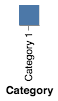

In [8]:
one_square_heatmap = alt.Chart(df).mark_rect().encode(
    x = 'Category'
).transform_filter(
    datum.Category == 'Category 1'
)

one_square_heatmap

...but all the data is still included in the JSON

In [9]:
one_square_heatmap.to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'data': {'name': 'data-dcc63c1bd6179d79fcae39778c52b169'},
 'mark': 'rect',
 'encoding': {'x': {'type': 'nominal', 'field': 'Category'}},
 'transform': [{'filter': "(datum.Category === 'Category 1')"}],
 '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json',
 'datasets': {'data-dcc63c1bd6179d79fcae39778c52b169': [{'Item': 'Item 1',
    'Category': 'Category 1',
    'value': 6},
   {'Item': 'Item 2', 'Category': 'Category 1', 'value': 8},
   {'Item': 'Item 3', 'Category': 'Category 1', 'value': 10},
   {'Item': 'Item 4', 'Category': 'Category 1', 'value': 20},
   {'Item': 'Item 5', 'Category': 'Category 1', 'value': 23},
   {'Item': 'Item 1', 'Category': 'Category 2', 'value': 29},
   {'Item': 'Item 2', 'Category': 'Category 2', 'value': 27},
   {'Item': 'Item 3', 'Category': 'Category 2', 'value': 21},
   {'Item': 'Item 4', 'Category': 'Category 2', 'value': 17},
   {'Item': 'Item 5', 'Category':

## MaxRowsError

Having all the data embedded in every visualization will not only bog down your notebook, it will probably eventually give you an error called the MaxRowsError. You can take off limit for number of rows, but that's not a great idea because you end up with huge notebooks!

Instead, we can specify that the outputs should just refer to a JSON file on your local drive and load in the data from there for each plot. This JSON file will be created automatically, it'll get reused within a session, and you'll never have to pay attention to it's name. 

See the [Altair tutorial notebook](https://github.com/altair-viz/altair-tutorial/blob/master/notebooks/03-Binning-and-aggregation.ipynb) `03-Binning-and-aggregation` for more details.

*Note that you can just manually save your data in a json file and pass that file URL to Altair instead of having this process done automatically behind the scenes.*

In [10]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### Now data is just referenced from JSON in Vega-Lite specification

In [11]:
one_square_heatmap.to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'data': {'url': 'altair-data-734e125f330dd2d43ae418168a63d485.json',
  'format': {'type': 'json'}},
 'mark': 'rect',
 'encoding': {'color': {'type': 'quantitative', 'field': 'value'},
  'x': {'type': 'nominal', 'field': 'Category'},
  'y': {'type': 'nominal', 'field': 'Item'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json'}

## Other visual encodings

Let's get back to generating other alternative visual encodings for the data that will be better suited for particular comparisons we're trying to make easy for the audience.

### Square with size variation

**Note that now we're specifying the variable types**, in this case so Altair will give us a categorical (nominal) color scheme instead of ordinal.

[Encoding data types](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types)

|Data Type|Shorthand Code|Description
|---|---|---
|quantitative|Q|a continuous real-valued quantity
|ordinal|O|a discrete ordered quantity
|nominal|N|a discrete unordered category
|temporal|T|a time or date value

**Try switching the variable (encoding data) type for the color from "nominal" to "ordinal" and see what difference it makes.**

*Note that `mark_rect()` makes a rectangle that will always fill the cell, which is perfect for making heatmaps. A `mark_square()` is a square which can have size variation.*

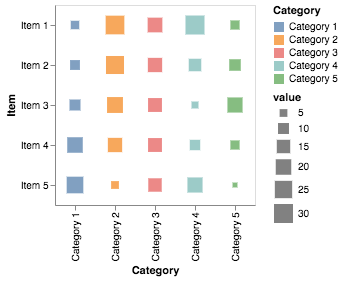

In [12]:
alt.Chart(df).mark_square().encode(
    x = 'Category:O',
    y = 'Item:O',
    color = 'Category:N',
    size = 'value:Q'
).properties(
    width = 200,
    height = 200
)

## Comparing summed levels with Stacked bars

Stacked bars might be a reasonable visual representation if part of the main story is the overall sums within Items.

*Note that it does, what to me seems like a strange ordering, putting the Category at the top of the legend at the end of the stacked bar...*

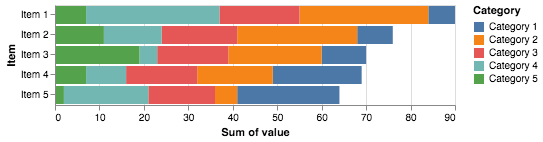

In [13]:
alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N'
)

## EXERCISE

Before we proceed, try making a similar stacked bar chart, but **this time with a bar for each category (along the bottom), each bar representing the sum of the values within the category, and a differnt color for each item.**

In [ ]:
alt.Chart(----).mark_----().encode(
    x = ----,
    y = ----,
    color = ----
)

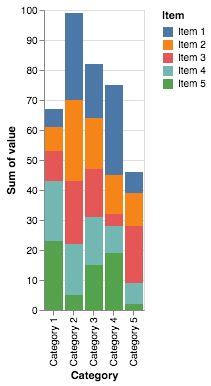

In [15]:
alt.Chart(df).mark_bar().encode(
    x = 'Category:N',
    y = 'sum(value):Q',
    color = 'Item:N'
)

## Comparing within item bars

If we want people to be able to make comparisons across categories within each item, say whether Category 2 or 4 is larger in Item 1, we need to give them a common baseline.

We can make what are sometimes called "small multiples" in Altair using `facet()` to specify that facets, or unique values, of a categorical variable should be split off and arranged along either rows or columns of the overall visualization. **Visuals shown within each facet are only the subset of the data corresponding to that category!**

*Note that we could alternatively specified `row = 'Item:O'` right within the encoding instead of needing the `.facet()` section. The advantage of using `.facet()` is that you can make faceted views of more complicated charts.*

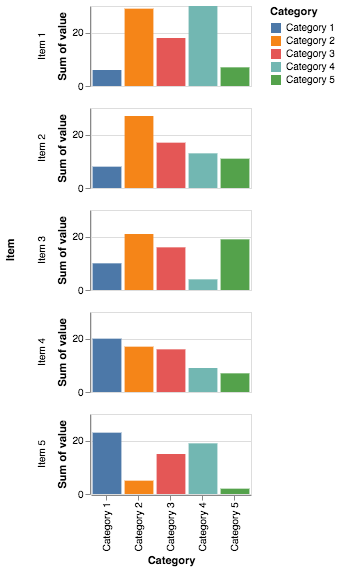

In [16]:
alt.Chart(df).mark_bar().encode(
    x = 'Category:O',
    y = 'sum(value):Q',
    color = 'Category:N'
).properties(
    width = 160,
    height = 80
).facet(
    row='Item:O'
)

## Dot plot for the same comparison

Another way to give the categories within an item a common baseline is to make a dot plot. This works well as long as there isn't too much value overlap.

- Default is grid lines on continuous scale axes and not on nominal or ordinal, but I want lines along each item to help guide the eye. [Top-level configuration docs](https://altair-viz.github.io/user_guide/configuration.html). 
- We also could have specified the circle size in the `encode()` section with `size = alt.value(150)`.

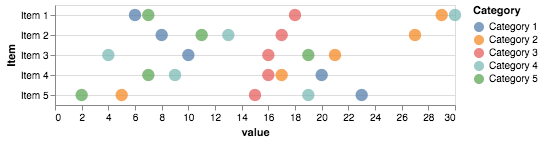

In [17]:
alt.Chart(df).mark_circle(size=150).encode(
    x = 'value:Q',
    y = 'Item:O',
    color = 'Category:N'
).configure_axisY(
    grid=True
).configure_axisX(
    grid=False
)

## Layering dots and lines – guides the eye

**It's not usually a great idea to connect categorical variables with lines, since there is nothing between the categories**, but let's try it here to see if it helps guide the eye.

**Altair let's us use a `+` to layer individual charts and match their axes.**

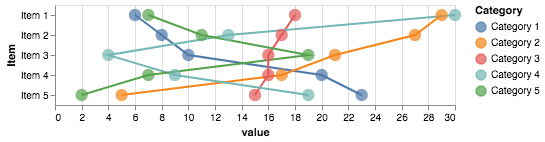

In [18]:
dots = alt.Chart(df).mark_circle(size=150).encode(
    x = 'value:Q',
    y = 'Item:O',
    color = 'Category:N'
)

lines = alt.Chart(df).mark_line().encode(
    x = 'value:Q',
    y = 'Item:O',
    color = 'Category:N'
)

lines + dots

### Configuring the layered chart

The aspect ratio of this plot makes it hard to follow some of the steep lines, so let's change the size and re-configure the axis grids at the same time. 

*Note that Altair will give you an error if you try to do an overall configuration on just one of the plots.*

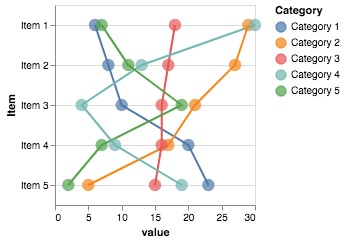

In [19]:
dots = alt.Chart(df).mark_circle(size=150).encode(
    x = 'value:Q',
    y = 'Item:O',
    color = 'Category:N'
)

lines = alt.Chart(df).mark_line().encode(
    x = 'value:Q',
    y = 'Item:O',
    color = 'Category:N'
)

(lines + dots).configure_axisY(
    grid=True
).configure_axisX(
    grid=False
).properties(
    width = 200,
    height = 200
)

## Reducing repeated elements

We can see in the example above that the lines and dots plots are almost exactly the same. Altair lets us use that and just add the differences.

- We'll define a base plot with all of the common elements, and 
- then add the differences to each right before layering

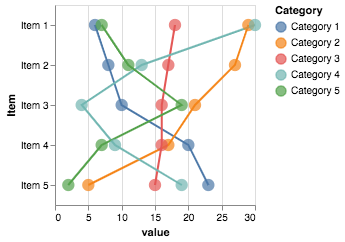

In [20]:
base_plot = alt.Chart(df).encode(
    x = 'value:Q',
    y = 'Item:O',
    color = 'Category:N'
).properties(
    width = 200,
    height = 200
)

base_plot.mark_line() + base_plot.mark_circle(size=150)

## Back to the stacked bar – now with tooltip and order!

What if we wanted to compare the lengths within a category? We're bad at comparing bar sizes that don't have common baselines.

*Note that the bar color stacking puts the first legend item furthest right, so **here we've added an "order" (and a tooltip for fun)**.*

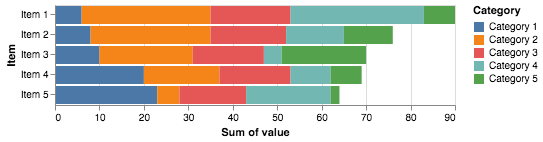

In [21]:
alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N',
    order = alt.Order('Category:O', sort='ascending'),
    tooltip=['Item','Category','sum(value)']
)

## Comparing within category bars

The common baseline again gives us easy comparisons within a category

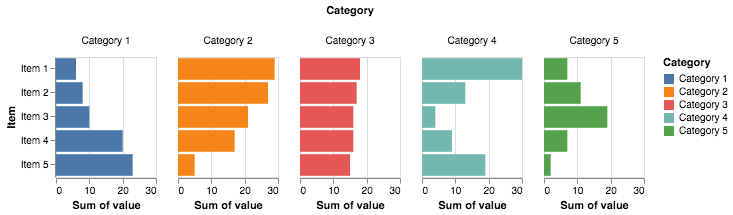

In [22]:
alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N'
).properties(
    width = 100,
    height = 120
).facet(
    column='Category:O'
)

---

# Saving to files

It's easy to save out an HTML file for the visualization, or the JSON specification. These will get saved in the same directory as JupyterLab is running.

In [24]:
bars = alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N'
)

In [25]:
bars.save('stacked_bars.html')
bars.save('stacked_bars.json')

## SVG and PNG require Selenium

You can always render your visualization in the notebook and use the button to render to SVG or PNG. This method uses the web browswer you're using for your notebook to render to the file. You can also do the same from the HTML you generated in the previous step.

If you want to render an SVG or PNG as an image from a command, without displaying it in a notebook or web page first, you need to have the Python module selenium installed. Selenium is a "headless" browser, which is like creating a web page in code with no visual display.

*This will probably give you an error on these machines.*

In [26]:
bars.save('stacked_bars.svg')
bars.save('stacked_bars.png')

ImportError: selenium package is required for saving chart as svg

---

## Extra: Changing the color mapping

The stacked bar chart you created above re-used the same colors for the items that we've been using for the categoryies. 

**It's not a great idea to have the same color meaning two different things in nearby visualizations. We can switch the set of colors Altair uses by specifying a `Scale()` as an extra argument to `Color()`.**

*See the [Vega documentation](https://vega.github.io/vega/docs/schemes/) for a list of available color schemes*

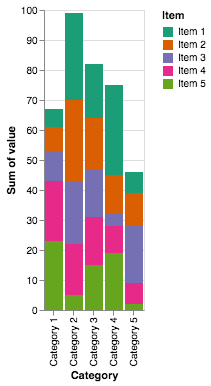

In [27]:
alt.Chart(df).mark_bar().encode(
    x = 'Category:N',
    y = 'sum(value):Q',
    color = alt.Color('Item:N', scale=alt.Scale(scheme='dark2'))
)